# Reza Arabpour 

## Testing Different Clustring Algorithmes on DataMining Lab Datasets

### Data Preprocessing

```
ابتدا کتابخانه های مورد نیاز را وارد میکنیم
```

In [ ]:
#Loading General Tools and Libraries
!pip install fuzzy-c-means 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.1
    Uninstalling typer-0.4.1:
      Successfully uninstalled typer-0.4.1


### Data Processing



```
داده های مورد نیاز را به کولب اپلود میکنیم و در دیتافریم هایی ذخیره میکنم
```



In [ ]:
#Loading Dataset
from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv('first_clustering_dataset.csv', names=['col1', 'col2'])
df2 = pd.read_csv('second_clustering_dataset.csv', names=['col1', 'col2'])
df3 = pd.read_csv('third_clustering_dataset.csv', names=['col1', 'col2'])

Saving first_clustering_dataset.csv to first_clustering_dataset.csv
Saving second_clustering_dataset.csv to second_clustering_dataset.csv
Saving third_clustering_dataset.csv to third_clustering_dataset.csv




```
با توجه به اینکه کلاسترینگ میخواهیم انجام دهیم و امکان بایاس شدن مدل ها بسیار زیاد است
(به دلیل استفاده از فاصله ها اقلیدسی و وجود اسکیل متفاوت هر بعد)
  داده هارا نرمالایز میکنیم
```



In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df1 = sc.fit_transform(df1)
df2 = sc.fit_transform(df2)
df3 = sc.fit_transform(df3)

### Ploting Data



```
برای بخش اول سوال داده هارا روی صفحه رسم میکنیم 
و به حدس تعداد کلاستر ها میپردازیم
```



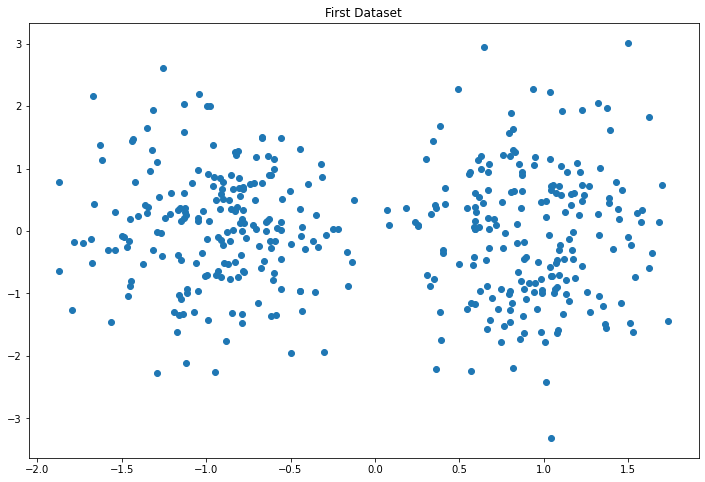

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1])
plt.title(label='First Dataset')
plt.show()



```
احتمالا برای این دیتاست دو کلاستر معقول باشد
```



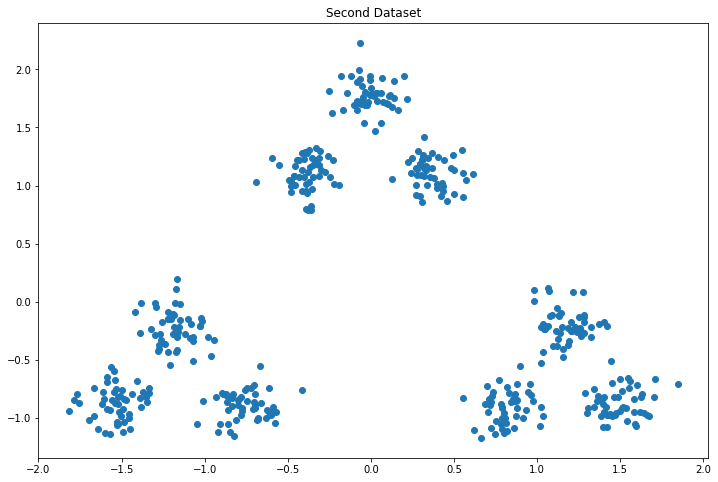

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1])
plt.title(label='Second Dataset')
plt.show()



```
احتمالا برای این دیتاست سه و یا نه کلاستر معقول باشد
```



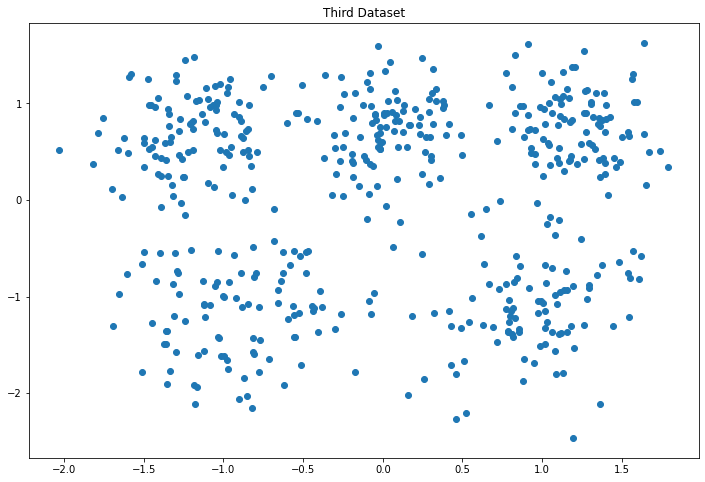

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1])
plt.title(label='Third Dataset')
plt.show()



```
احتمالا برای این دیتاست پنج کلاستر معقول باشد
```



### K-Means Clustering



```
حال به پیاده سازی الگوریتم مذکور میپردازیم
```



#### First Dataset With K = 4



```
برای دیتاست اول مدل را میسازیم و مقادیر بر چسب ها را ذخیره میکنیم
```



In [ ]:
#Model Making and Training
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=4, max_iter = 1000, random_state = 42)
kmeans1.fit(df1)
y1 = kmeans1.labels_



```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



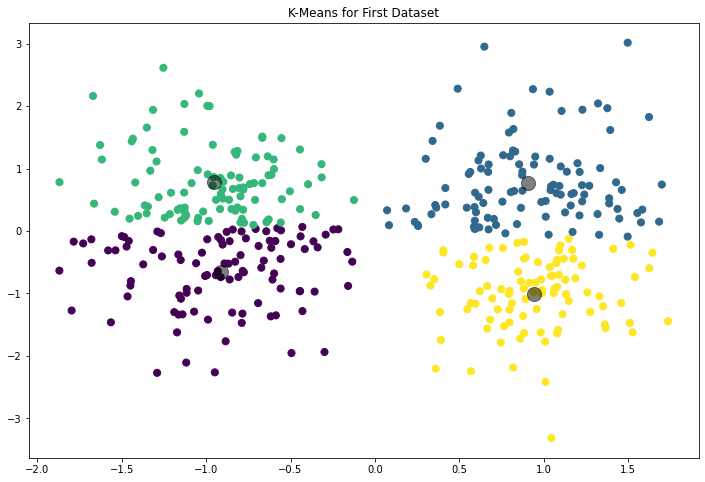

In [ ]:
#Plotting the resualt
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1], c=y1, s=50, cmap='viridis')
centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means for First Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
print("SSE Error = ", kmeans1.inertia_)

SSE Error =  193.20860240983205


#### Second Dataset With K = 3



```
برای دیتاست دوم مدل را میسازیم و مقادیر بر چسب ها را ذخیره میکنیم
```



In [ ]:
#Model Making and Training
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=3, max_iter = 1000, random_state = 42)
kmeans2.fit(df2)
y2 = kmeans2.predict(df2)



```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



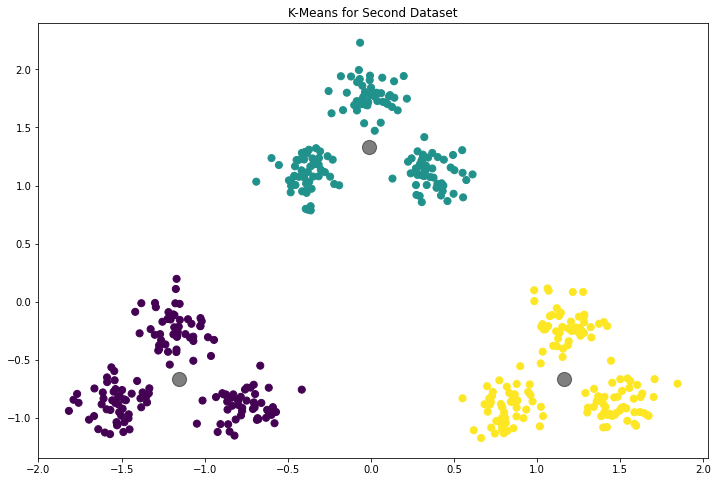

In [ ]:
#Plotting the resualt
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1], c=y2, s=50, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means for Second Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
print("SSE Error = ", kmeans2.inertia_)

SSE Error =  99.01689818029729


#### Third Dataset With K = 5



```
برای دیتاست سوم مدل را میسازیم و مقادیر بر چسب ها را ذخیره میکنیم
```



In [ ]:
#Model Making and Training
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=5, max_iter = 1000, random_state = 42)
kmeans3.fit(df3)
y3 = kmeans3.labels_



```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



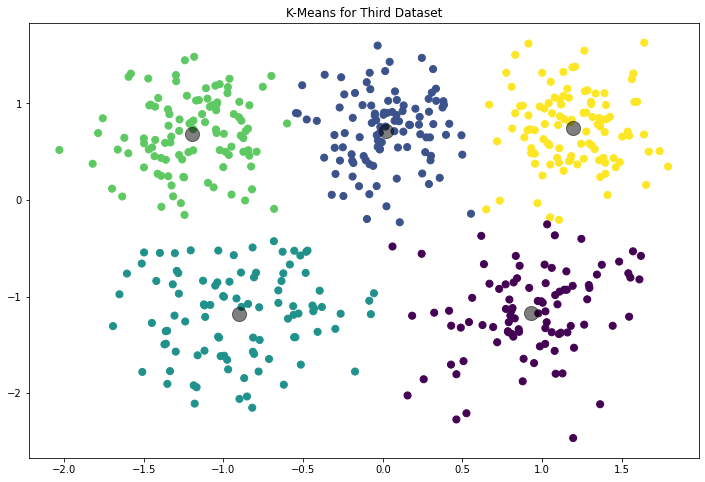

In [ ]:
#Plotting the resualt
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1], c=y3, s=50, cmap='viridis')
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means for Third Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
print("SSE Error = ", kmeans3.inertia_)

SSE Error =  127.4119395729554


### Elbow Point Ploting

#### Elbow Curve for First Dataset



```
حال با توجه به خواست سوال برای هرکدام از این داده ها نقاط زانویی را پیدا میکنیم
به این صورت که برای هر تعداد کلاستر، دویست بار الگوریتم را اجرا میکنیم
و بهترین نتیجه خطا را به عنوان نماینده انتخاب میکنیم
```



In [ ]:
number_of_clusers = range(1, 16)
number_of_iterations = range(200)
kmeansGrid1 = [[KMeans(n_clusters=i, max_iter = 300).fit(df1) for j in number_of_iterations] for i in number_of_clusers]
bestscore1 = [max([kmeansGrid1[i][j].inertia_ for j in number_of_iterations]) for i in range(15)]

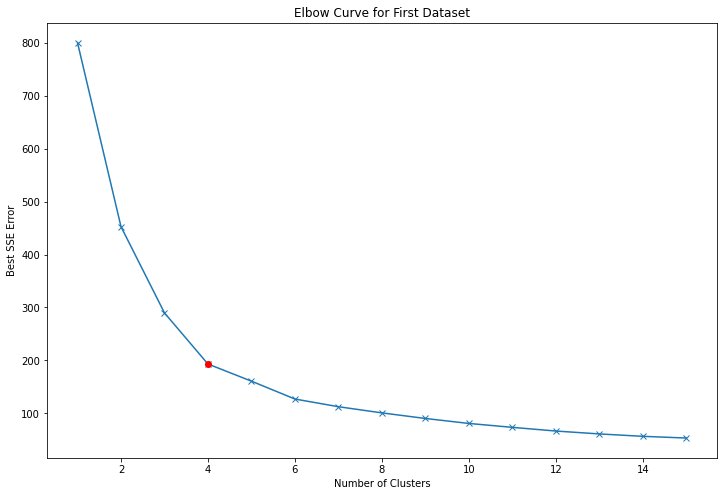

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(number_of_clusers, bestscore1, '-x')
plt.plot(number_of_clusers[3], bestscore1[3], '-or')
plt.title('Elbow Curve for First Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Best SSE Error')
plt.show()



```
مشاهده میشود که در دیتاست اول تقریبا نقطه ۴ نقطه زانویی است
```



#### Elbow Curve for Second Dataset



```
حال با توجه به خواست سوال برای هرکدام از این داده ها نقاط زانویی را پیدا میکنیم
به این صورت که برای هر تعداد کلاستر، دویست بار الگوریتم را اجرا میکنیم
و بهترین نتیجه خطا را به عنوان نماینده انتخاب میکنیم
```



In [ ]:
number_of_clusers = range(1, 16)
number_of_iterations = range(200)
kmeansGrid2 = [[KMeans(n_clusters=i, max_iter = 300).fit(df2) for j in number_of_iterations] for i in number_of_clusers]
bestscore2 = [max([kmeansGrid2[i][j].inertia_ for j in number_of_iterations]) for i in range(15)]

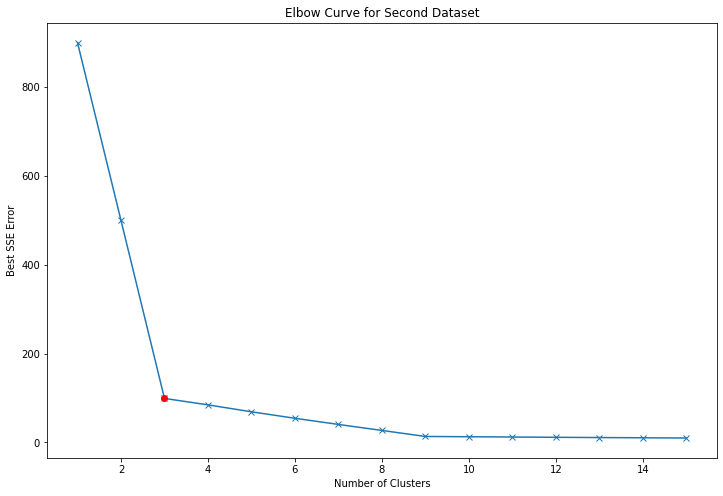

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(number_of_clusers, bestscore2, '-x')
plt.plot(number_of_clusers[2], bestscore2[2], '-or')
plt.title('Elbow Curve for Second Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Best SSE Error')
plt.show()



```
در این دیتاست به وضوح نقطه ۳ نقطه زانویی است
```



#### Elbow Curve for Third Dataset



```
حال با توجه به خواست سوال برای هرکدام از این داده ها نقاط زانویی را پیدا میکنیم
به این صورت که برای هر تعداد کلاستر، دویست بار الگوریتم را اجرا میکنیم
و بهترین نتیجه خطا را به عنوان نماینده انتخاب میکنیم
```



In [ ]:
number_of_clusers = range(1, 16)
number_of_iterations = range(200)
kmeansGrid3 = [[KMeans(n_clusters=i, max_iter = 300).fit(df3) for j in number_of_iterations] for i in number_of_clusers]
bestscore3 = [max([kmeansGrid3[i][j].inertia_ for j in number_of_iterations]) for i in range(15)]

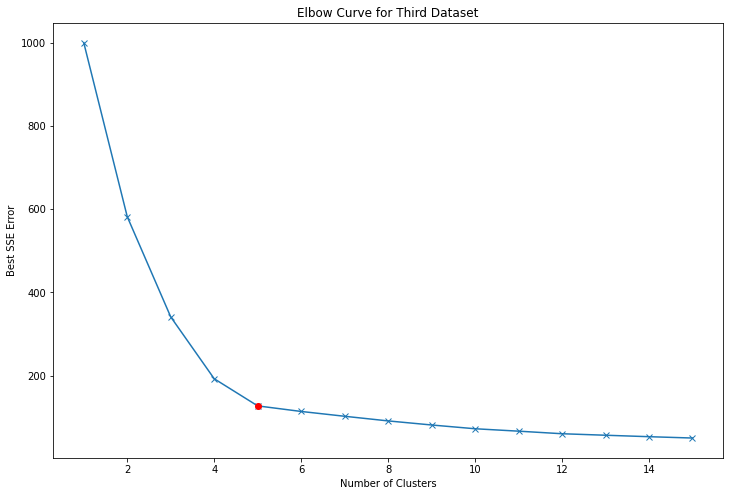

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(number_of_clusers, bestscore3, '-x')
plt.plot(number_of_clusers[4], bestscore3[4], '-or')
plt.title('Elbow Curve for Third Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Best SSE Error')
plt.show()



```
در دیتاست آخر نیز تقطه ۵ به وضوح نقطه زانویی ماست
```



### Fuzzy C-Means



```
در این بخش نیز به پیاده سازی الگوریتم فوق میپردازیم و نتایج را مشاهده میکنیم
```



#### Fuzzy C-Means for First Dataset



```
با توجه قسمت قبل و داده های دریافتی از نقاط زانویی اینبار نیز اینجا کلاسترینگ میکنیم
```



In [ ]:
from fcmeans import FCM

fuzzyCMeans1 = FCM(n_clusters=4)
fuzzyCMeans1.fit(df1)

fuzzy_c1 = fuzzyCMeans1.centers
fuzzy_y1 = fuzzyCMeans1.predict(df1)



```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



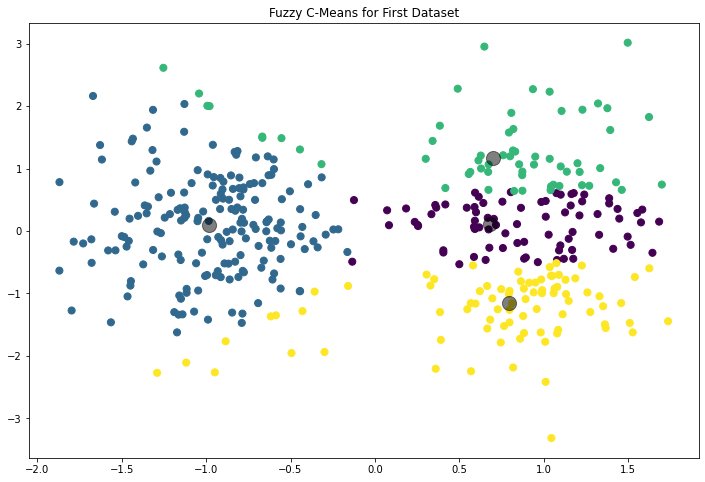

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1], c=fuzzy_y1, s=50, cmap='viridis')
plt.scatter(fuzzy_c1[:, 0], fuzzy_c1[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fuzzy C-Means for First Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
SSE_Fuzzy_1 = sum(sum([(df1[i,:] - fuzzy_c1[fuzzy_y1[i]])**2 for i in range(len(df1))]))
print("SSE Error = ", SSE_Fuzzy_1)

SSE Error =  262.044509662292


#### Fuzzy C-Means for Second Dataset



```
مدل را ساخته و بر روی داده های این دیتاست نیز اعمال میکنیم 
```



In [ ]:
from fcmeans import FCM

fuzzyCMeans2 = FCM(n_clusters=3)
fuzzyCMeans2.fit(df2)

fuzzy_c2 = fuzzyCMeans2.centers
fuzzy_y2 = fuzzyCMeans2.predict(df2)



```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



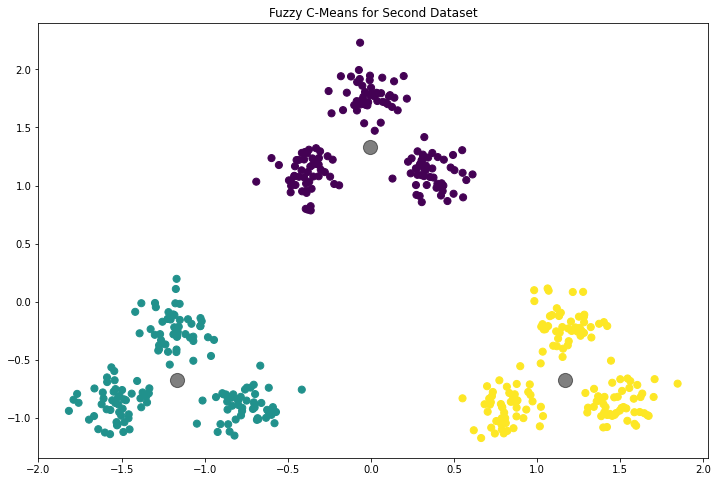

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1], c=fuzzy_y2, s=50, cmap='viridis')
plt.scatter(fuzzy_c2[:, 0], fuzzy_c2[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fuzzy C-Means for Second Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
SSE_Fuzzy_2 = sum(sum([(df2[i,:] - fuzzy_c2[fuzzy_y2[i]])**2 for i in range(len(df2))]))
print("SSE Error = ", SSE_Fuzzy_2)

SSE Error =  99.05379127960089


#### Fuzzy C-Means for Third Dataset



```
مدل را ساخته و بر روی داده های این دیتاست نیز اعمال میکنیم 
```



In [ ]:
from fcmeans import FCM

fuzzyCMeans3 = FCM(n_clusters=5)
fuzzyCMeans3.fit(df3)

fuzzy_c3 = fuzzyCMeans3.centers
fuzzy_y3 = fuzzyCMeans3.predict(df3)



```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



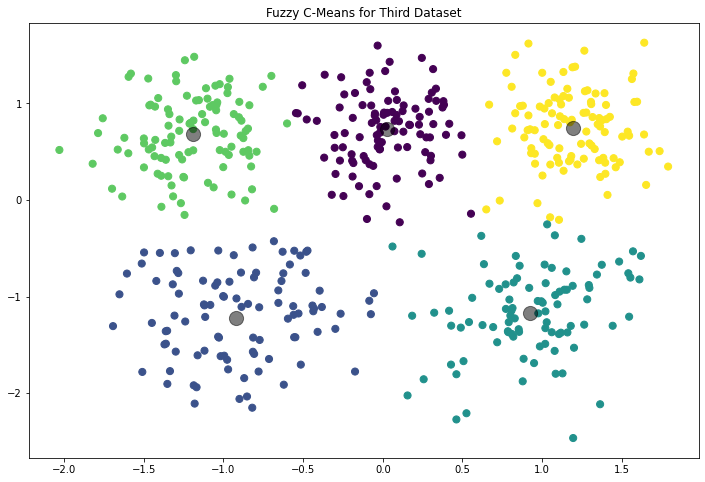

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1], c=fuzzy_y3, s=50, cmap='viridis')
plt.scatter(fuzzy_c3[:, 0], fuzzy_c3[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fuzzy C-Means for Third Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
SSE_Fuzzy_3 = sum(sum([(df3[i,:] - fuzzy_c3[fuzzy_y3[i]])**2 for i in range(len(df3))]))
print("SSE Error = ", SSE_Fuzzy_3)

SSE Error =  127.65978763196354


### DBScan Clustering



```
در این بخش نیز از الگوریتم مذکور استفاده میکنیم تا داده هارا خوشه بندی کنیم
توجه شود که در این الگوریتم تعدا خوشه ها را ما تعیین نیکنیم فلذا با تعداد آزمون و خطا
به اعدا زیر رسیده ایم که نتیجه ای تقریبا مطلوب داشته

توجه شود که الگوریتم های دنسیتی بیس به این دلیل که مرکز کلاستر ندارند محاسبه خطای اس اس ای شان مستقیما ممکن نیست مگر آنکه به طور ضمنی مرکز کلاستر را محاسبه کنیم و به صورت دستی خطای اس اس ای اینترکلاستری را محاسبه کنیم
```



#### DBScan for the First Dataset



```
مدل را با پارامتر های زیر ساخته و بر روی داده های این دیتاست نیز اعمال میکنیم
تا نتیجه ای نسبتا معقول بگیریم ، در هر بخش نیز تعداد کلاستر های به دست آمده را
چاپ کرده ایم.
و مرکز های کلاستر را به صورت ضمنی محاسبه کرده ایم.
```



In [ ]:
from sklearn.cluster import DBSCAN
DBS1 = DBSCAN(eps=0.2, min_samples=7).fit(df1)
DBS1_y = DBS1.labels_
DBS1_y += 1
print("number of clusets =",len(set(DBS1_y)))
DBScan_c1 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(set(DBS1_y))):
  for j in  range(len(df1)):
    if DBS1_y[j] == i:
      DBScan_c1[i].append(df1[j])
DBScan_c1 = [sum(DBScan_c1[i])/len(DBScan_c1[i]) for i in range(len(DBScan_c1))]
DBScan_c1 = np.array(DBScan_c1)

number of clusets = 10




```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



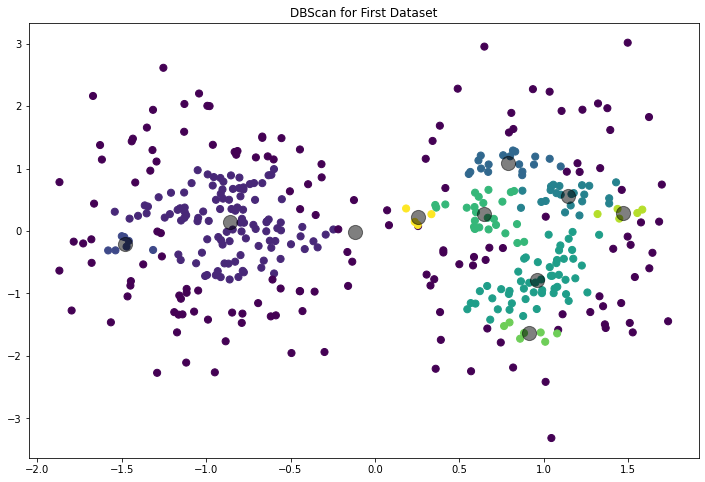

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1], c=DBS1_y, s=50, cmap='viridis')
plt.scatter(DBScan_c1[:, 0], DBScan_c1[:, 1], c='black', s=200, alpha=0.5)
plt.title('DBScan for First Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
SSE_DBScan_1 = sum(sum([(df1[i,:] - DBScan_c1[DBS1_y[i]])**2 for i in range(len(df1))]))
print("SSE Error = ", SSE_DBScan_1)

SSE Error =  503.44452639013593


#### DBScan for the Second Dataset



```
مدل را ساخته و بر روی داده های این دیتاست نیز اعمال میکنیم 
و سپس مرکز های کلاستر را به صورت ضمنی محاسبه کرده ایم.

```



In [ ]:
from sklearn.cluster import DBSCAN

DBS2 = DBSCAN(eps=0.2, min_samples=9).fit(df2)
DBS2_y = DBS2.labels_
print("number of clusets =",len(set(DBS2_y)))
DBS2_y += 1
DBScan_c2 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(set(DBS2_y))):
  for j in  range(len(df2)):
    if DBS2_y[j] == i:
      DBScan_c2[i].append(df2[j])
DBScan_c2 = [sum(DBScan_c2[i])/len(DBScan_c2[i]) for i in range(len(DBScan_c2))]
DBScan_c2 = np.array(DBScan_c2)

number of clusets = 10




```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



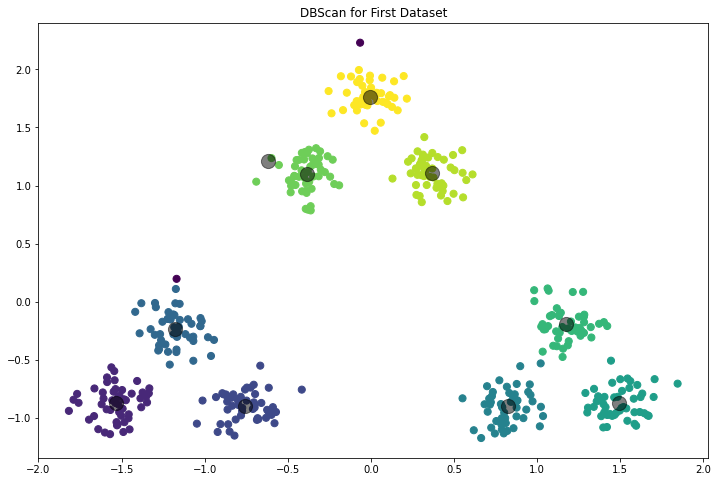

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1], c=DBS2_y, s=50, cmap='viridis')
plt.scatter(DBScan_c2[:, 0], DBScan_c2[:, 1], c='black', s=200, alpha=0.5)
plt.title('DBScan for First Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
SSE_DBScan_2 = sum(sum([(df2[i,:] - DBScan_c2[DBS2_y[i]])**2 for i in range(len(df2))]))
print("SSE Error = ", SSE_DBScan_2)

SSE Error =  15.673888437759278


#### DBScan for the Third Dataset



```
مدل را ساخته و بر روی داده های این دیتاست نیز اعمال میکنیم 
و سپس مرکز های کلاستر را به صورت ضمنی محاسبه کرده ایم.

```



In [ ]:
from sklearn.cluster import DBSCAN

DBS3 = DBSCAN(eps=0.25, min_samples=10).fit(df3)
DBS3_y = DBS3.labels_
print("number of clusets =",len(set(DBS3_y)))
DBS3_y += 1
DBScan_c3 = [[],[],[],[],[],[],[]]
for i in range(len(set(DBS3_y))):
  for j in  range(len(df3)):
    if DBS3_y[j] == i:
      DBScan_c3[i].append(df3[j])
DBScan_c3 = [sum(DBScan_c3[i])/len(DBScan_c3[i]) for i in range(len(DBScan_c3))]
DBScan_c3 = np.array(DBScan_c3)

number of clusets = 7




```
حال نقاط را با توجه به برچسبشان رنگ کرده و رسم میکنیم
```



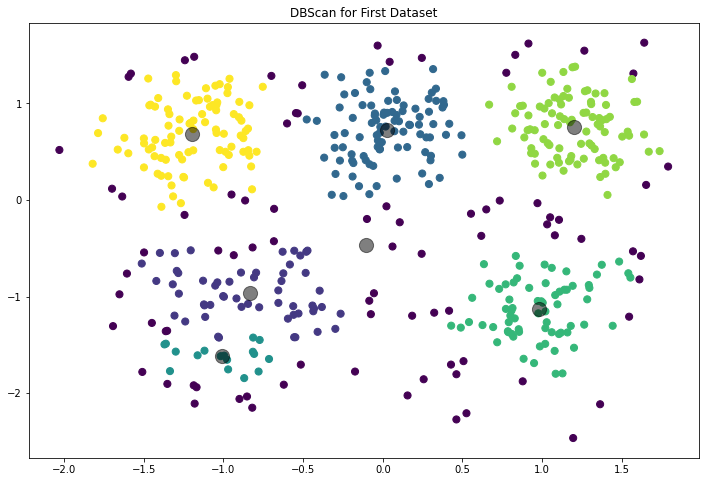

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1], c=DBS3_y, s=50, cmap='viridis')
plt.scatter(DBScan_c3[:, 0], DBScan_c3[:, 1], c='black', s=200, alpha=0.5)
plt.title('DBScan for First Dataset')
plt.show()



```
و در انتها نیز مجموع مربعات خطا هارا برای مقایسه بعدی محاسبه میکنیم
```



In [ ]:
SSE_DBScan_3 = sum(sum([(df3[i,:] - DBScan_c3[DBS3_y[i]])**2 for i in range(len(df3))]))
print("SSE Error = ", SSE_DBScan_3)

SSE Error =  273.4110050308556


### Conclusion


```
با توجه به آنچه که دیدیم
در مدل های بالا تقریبا مدل های بر مبنای چگالی تنها در صورتی که داده ها به طور ذاتی
 از هم جدا شده باشند و بین اعضای یک دسته نزدیکی فاصله به صورت مکانی وجود داشته باشد خوب عمل میکنند.
اما در داده های این سوال چنین داده هایی نداشتیم به جز دیتاست دوم
 اما در دو دیتاست دیگر عملکرد الگوریت دی بی اسکن واقعا بد و غیر قابل قبول بود که در 
 تابع خطای درون کلاستری نیز مشهود بود.
اما در میان دو الگوریتم دیگر، اگوریتم کا-مینز با اختلاف بسیار جزئی از الگوریتم فازی جلو تر بود
 ولی در کل هر دو الگوریتم روی داده هایی به این شکل به خوبی عمل کرده بودند

نتیجه گیری بر اساس دقت
۱ کا-مینز
۲ فازی کلاسترینگ
۳ دنسیتی بیس اسکن

نتیجه گیری بر اساس استفاده
دیتای با خاصیت نزدیکی اعضای یک کلاس و فاصله نسبی زیاد کلاس ها 
-دنسیتی بیس  اسکن
دیتای با کلاس های درون هم تنیده و نزدیک
-فازی کلاسترینگ
دیتا های معمول و حالت میانگین
-کا مینز
```





```
هر چند با توجه به ماهیت رندوم اجرا شدن الگوریتم ها و ساختار ساده دیتا هایمان 
انچنان لازم به اجرای ۲۰۰ ایتریشن نیست اما این کار را انجام میدهیم برای اثبات نتیجه
توجه شود که لازم نیست دنسیتی بیس اسکن را اجرا کنیم چون نتایجش با همان پارامتر ها ثابت میماند
```



In [ ]:
from fcmeans import FCM
from sklearn.cluster import KMeans

FuzzyErrors1 = []
FuzzyErrors2 = []
FuzzyErrors3 = []
KmeansErrors1 = []
KmeansErrors2 = []
KmeansErrors3 = []

numberOfIterations = 200

for i in range(numberOfIterations):
  fuzzyCMeans1 = FCM(n_clusters=4)
  fuzzyCMeans1.fit(df1)
  fuzzy_c1 = fuzzyCMeans1.centers
  fuzzy_y1 = fuzzyCMeans1.predict(df1)
  SSE_Fuzzy_1 = sum(sum([(df1[j,:] - fuzzy_c1[fuzzy_y1[j]])**2 for j in range(len(df1))]))
  FuzzyErrors1.append(SSE_Fuzzy_1)

  fuzzyCMeans2 = FCM(n_clusters=3)
  fuzzyCMeans2.fit(df2)
  fuzzy_c2 = fuzzyCMeans2.centers
  fuzzy_y2 = fuzzyCMeans2.predict(df2)
  SSE_Fuzzy_2 = sum(sum([(df2[j,:] - fuzzy_c2[fuzzy_y2[j]])**2 for j in range(len(df2))]))
  FuzzyErrors2.append(SSE_Fuzzy_2)

  fuzzyCMeans3 = FCM(n_clusters=5)
  fuzzyCMeans3.fit(df3)
  fuzzy_c3 = fuzzyCMeans3.centers
  fuzzy_y3 = fuzzyCMeans3.predict(df3)
  SSE_Fuzzy_3 = sum(sum([(df3[j,:] - fuzzy_c3[fuzzy_y3[j]])**2 for j in range(len(df3))]))
  FuzzyErrors3.append(SSE_Fuzzy_3)

for i in range (numberOfIterations):
  kmeans1 = KMeans(n_clusters=4, max_iter = 300)
  kmeans1.fit(df1)
  KmeansErrors1.append(kmeans1.inertia_)

  kmeans2 = KMeans(n_clusters=3, max_iter = 300)
  kmeans2.fit(df2)
  KmeansErrors2.append(kmeans2.inertia_)

  kmeans3 = KMeans(n_clusters=5, max_iter = 300)
  kmeans3.fit(df3)
  KmeansErrors3.append(kmeans3.inertia_)

diff1 = sum(FuzzyErrors1) - sum(KmeansErrors1)
diff2 = sum(FuzzyErrors2) - sum(KmeansErrors2)
diff3 = sum(FuzzyErrors3) - sum(KmeansErrors3)

if  diff1 >= 0:
  print("For the first dataset the K-means advantage proved with ", diff1, "in total less error ! (200 times run)")
if  diff2 >= 0:
  print("For the second dataset the K-means advantage proved with ", diff2, "in total less error ! (200 times run)")
if  diff3 >= 0:
  print("For the third dataset the K-means advantage proved with ", diff3, "in total less error ! (200 times run)")

For the first dataset the K-means advantage proved with  470.1256866482363 in total less error ! (200 times run)
For the second dataset the K-means advantage proved with  7.3786299700987 in total less error ! (200 times run)
For the third dataset the K-means advantage proved with  49.56880589366483 in total less error ! (200 times run)
